In [1]:
import numpy as np

import matplotlib.pyplot as plt
from scipy import linalg

plt.rcParams.update({'font.size': 18})
plt.rcParams['lines.linewidth'] = 3

pi=np.pi

# ME 3263 Introduction to Sensors and Data Analysis (Fall 2018)

## Lab #4 Predicting Natural Frequencies with the Finite Element Method


### What is the Finite Element Method?

The Euler-Lagrange dynamic beam equation is an example of a partial differential
equation (PDE). These equations are common in many engineering applications e.g.
solid mechanics, electromagnetics, fluid mechanics, and quantum mechanics. The
finite element method solves PDEs. The FEM process involves two steps to create
matrices for a computer algorithm solution. First, the PDE is integrated from
the strong form to the weak form. Second, an approximation of the variable
"shapes" within each "element" is created to convert the integrals and
derivatives into matrices
[(1)](http://bcs.wiley.com/he-bcs/Books?action=index&bcsId=3625&itemId=0470035803).
For elements with nodes only at vertices, such as cubes (hexahedrons) or
pyramids (tetrahedrals), the "shape" function is linear for displacement.  The
simplest FEM divides a continuous structure into finite, interacting elements.
As a simple example, consider a rectangular beam with a force applied to stretch
it axially, as seen in Figure 1. Hooke's law relates the force applied to strain
and deflection as such 

$F^{e} = A^{e}E^{e}\epsilon^{e} =
A^{e}E^{e}\frac{\delta^{e}}{l^{e}}=k^{e}\delta^{e}$
(1)

where $k^{e}$ is the stiffness (force/displacement) of each element, $E^{e}$ is
the Young's modulus of each element, $\epsilon^{e}$ is the strain in each
element, $\delta^{e}$ is the change in length of each element, and $l^{e}$ is
the original length of each element. Considering the displacement of each node,
$u_{i}$, the force on the element 1 is formed as such

$\left[\begin{array}{c} F_{1} \\ F_{2}\end{array}\right] =
\left[\begin{array}{c c} k^{e} & -k^{e}\\ -k^{e} & k^{e}\end{array}\right]
\left[\begin{array}{c} u_{1} \\ u_{2}\end{array}\right]$ (2)

where $F_1$ and $F_2$ are the forces on nodes 1 and 2, respectively, and $u_1$
and $u_2$ are the displacements of nodes 1 and 2, respectively. 

![Figure 1: Diagram of axial loads on a beam made of one finite element.](./figure_01.png)

*Figure 1: Diagram of axial loads on a beam made of one finite element.*

### Predicting Natural Frequencies

In this lab you will use Ansys to predict natural frequencies of the
rectangular cantilever
beam. In finite element analysis (FEA), this is called a modal
analysis. In any FEA simulation, there are three steps: pre-process, solve, and
post-process. Here are the steps in a FEA modal analysis [(2)](./Ansys_Modal-Analysis.pdf):

1. Pre-process
  
  a. Define material constants

  b. Create geometric model

  c. Define boundary conditions

  d. Mesh the model (turn the continuous volume into discrete nodes and elements)

2. Solve

  a. Assemble stiffness matrix, $K$

  b. Assemble mass matrix, $M$

  c. solve the eigenvalue problem, $Ku=\lambda M u$

3. Post-process
  
  a. Determine natural frequencies

  a. Plot mode shapes

  b. Determine maximum displacement/acceleration for each mode

  c. Determine maximum stress and strain for each mode

### Two Degree of Freedom Modal Analysis Example

The solution for a modal analysis is accomplished by solving for eigenvalues of
the mass and stiffness matrices, $\bar{\bar{M}}$ and $\bar{\bar{K}}$, respectively [(3)](https://books.google.com/books/about/Engineering_Vibration.html?id=OCg-XwAACAAJ). The output is a
number of eigenvalues, or natural frequencies, and their corresponding
eigenvectors, or mode shapes. As a simple example, consider the lumped mass
solution of two masses connected by three springs as seen in Fig. 2. 

![Figure 2: Two masses connected to 3 springs](./spring_mass.png)

*Figure 2: Two masses connected to 3 springs*

In the 2-mass system, we have 2 degrees of freedom, so there are 2 differential
equations that describe the motion of masses as such

$m_1 \ddot{x}_1 = -k_1x_1-k_2(x_1-x_2)$  (3a)

$m_2 \ddot{x}_2 = -k_3x_2-k_2(x_2-x_1)$  (3b)

where masses 1 and 2 have mass $m_1$ and $m_2$, respectively, and springs 1, 2,
and 3 have stiffness $k_1$, $k_2$, and $k_3$, respectively. The differential
equations relate acceleration of mass 1 and mass 2, $\ddot{x}_1$
and$\ddot{x}_2$, to displacement, $x_1$ and $x_2$. The mass and stiffness
matrices for this problem becomes

$\bar{\bar{M}}\frac{d^2\bar{x}}{dt^2}=-\bar{\bar{K}}\bar{x}$ (4a)

$\left[\begin{array}{cc}
m_1 & 0 \\
0 & m_2 \end{array}\right]
\frac{d^2}{dt^2}\left[\begin{array}{c}
x_1 \\
x_2 \end{array}\right]=
-\left[\begin{array}{cc}
k_1+k_2 & -k_2 \\
-k_2 & k_2+k_3 \end{array}\right]
\left[\begin{array}{c}
x_1 \\
x_2 \end{array}\right]$  (4b)

The solution for $\bar{x}$ will be a combination of sine and cosine functions at
given natural frequencies, depending upon initial conditions, substituting
$\bar{x}=\bar{u}\sin(\omega t)$ Eqn 4b becomes

$-\omega^2\left[\begin{array}{cc}
m_1 & 0 \\
0 & m_2 \end{array}\right]
\left[\begin{array}{c}
u_1 \\
u_2 \end{array}\right] \sin\omega t=
-\left[\begin{array}{cc}
k_1+k_2 & -k_2 \\
-k_2 & k_2+k_3 \end{array}\right]
\left[\begin{array}{c}
u_1 \\
u_2 \end{array}\right]\sin\omega t$  (5)

where $u_1$ and $u_2$ are amplitudes of the sine function and $\omega$ is the
natural frequency. Now, the two ordinary differential equations have been
converted to one eigenvalue problem. The eigenvalues, of $\bar{\bar{M}}$ and
$\bar{\bar{K}}$ are equal to the natural frequencies squared. In the following
example, the natural frequencies for $m_1=m_2$ = 0.2 kg and $k_1=k_2=k_3$ = 500
N/m. 

In [2]:
m1=m2=0.1 # 0.2 kg
k1=k2=k3=500 # 500 N/m

M=np.array([[m1,0],[0,m2]])
K=np.array([[k1+k2,-k2],[-k2,k2+k3]])
e,v=linalg.eig(K,M)
w1=np.sqrt(e[0].real)/2/pi
v1=v[:,0]/max(v[:,0])

w2=np.sqrt(e[1].real)/2/pi
v2=v[:,1]/max(v[:,1])
print('1st natural frequency is %1.0f Hz, \
     mode shape: %1.0f*x1(t)=%1.0f*x2(t)'%(w1,v1[0],v1[1]))
print('2nd natural frequency is %1.0f Hz, \
    mode shape: %1.0f*x1(t)=%1.0f*x2(t)'%(w2,v2[0],v2[1]))

1st natural frequency is 11 Hz,      mode shape: 1*x1(t)=1*x2(t)
2nd natural frequency is 19 Hz,     mode shape: -1*x1(t)=1*x2(t)


In [3]:
np.sqrt(e)/2/pi

array([11.25395395+0.j, 19.49242003+0.j])

![Figure 3: Vibration modes of 2-mass system when masses are 200 g and 3 springs have stiffness k=500 N/m](./eigenvalues.gif)

*Figure 3: Vibration modes of 2-mass system when masses are 200 g and 3 springs have stiffness k=500 N/m. The first and second modes are animated on the left and right, respectively.*

The amplitudes of the displacements will be proportional to the initial
velocities. A **modal analysis** is concerned with the natural frequencies and
mode shapes. This example has two modes (because it has two degrees of freedom).
In mode one, the displacement of mass 1 is equal to mass 2  and $\omega_{1}=\sqrt{(k_1+k_2)/(m_1+m_2)}$. In mode two, the
displacement of mass 1 is equal and opposite to mass 2 and $\omega_{2}=\sqrt{2(k_1+k_2+k_3)/(m_1+m_2)}$. The natural frequencies
are 8 and 14 Hz, for mode 1 and 2, respectively.

### FEA modal analysis

In the FEA modal analysis, each element is composed of 8 nodes (for hexahedrals) that are shared
by adjoining elements. Each node can move in three dimensions, which means the
total degrees of freedom of the system is $3\times$(number of nodes). So the
eigenvalue solution would reveal $3\times$(number of nodes) natural frequencies
and vibration modes. We cannot use the high vibration mode results because they
will not be accurate, but the lowest vibration modes will become more accurate
as we increase the number of nodes in the system. This is called "convergence".
The ideal FEA solution will reproduce our analytical or experimental results.
Table 1 demonstrates the convergence of the first natural frequency for a beam
where E=200 GPa, L=300 mm, t=3 mm, w=12 mm, and $\rho$=8050 kg/m^3. 

*Table 1: Convergence of the first natural frequency for a steel beam 
where E=200 GPa, L=300 mm, t=3 mm, w=12 mm, and $\rho$=8050 kg/m^3. Error is calculated based upon best estimate $f_{best}$ and analytical prediction $f_{an}$.* 

|# of nodes | first natural Frequency (Hz) | relative error $|f_{best}-f_{prev}|/f_{best}$ | absolute error $|f_{an}-f_{best}|/f_{an}$|
|--- | --- | --- |---|
|1153| 26.252 |  | 0.020
|1438 | 26.243 | 3.4e-4 |0.021 |
|1913 | 26.235 | 3.1e-4 |0.021|
|3621 | 26.219 | 3.1e-4 |0.021|
|4521 | 26.218 | 6.5e-4 |0.0217|
|10,437|26.217 |3.8e-5  |0.0218|
|21,351 | 26.215 |7.6e-5|0.0218|

Text(0, 0.5, 'relative error')

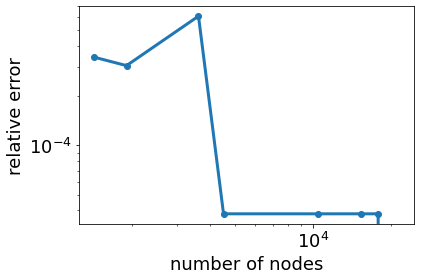

In [4]:
n=np.array([1153,  1438,  1913,  3621,   4521,   10437, 15316,  17801, 21351])
f=np.array([26.252,26.243,26.235,26.219, 26.218, 26.217,26.216, 26.215,26.215])
rel_error= np.abs(f[1:]-f[0:-1])/f[1:]
abs_error= np.abs(f-26.8)/26.8
plt.loglog(n[1:],rel_error,'o-')
plt.xlabel('number of nodes')
plt.ylabel('relative error')

Text(0, 0.5, 'absolute error')

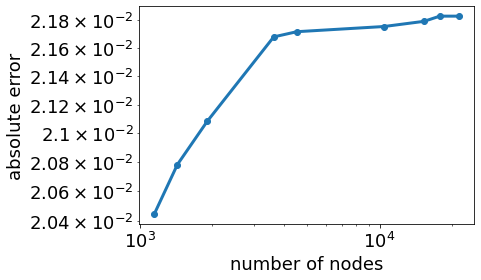

In [5]:
plt.loglog(n,abs_error,'o-')
plt.xlabel('number of nodes')
plt.ylabel('absolute error')

After 4,000 degrees of freedom, the first natural frequency mode has converged
(the relative error is stable and the absolute error has diminishing returns). The absolute error compares the analytical model
to the FEA model. There is a stable 2.2 % error in the frequencies predicted
from Euler-Lagrange beam theory and 3D FEA. **Make sure each reported frequency
has converged, demonstrate convergence in your report**. 

Check the accuracy of your model in 3 ways: 

1. Check convergence of your results (convergence)

2. Compare FEA results to analytical model (verification)
 
3. Compare FEA results to experimental results (validation)

Method 1 proves that your results are repeatable. Method 2 is a verification of
your model. Verification of a model proves that with different methods, the
assumptions in your model will converge to the same solution. Method 3 is a
validation of your model. Validation uses measured results to confirm your model
is correct. For many engineering structures, method 2 is not feasible. Instead,
we check convergence with method 1 and validate the model with experimental
results. Here, we are using natural frequencies as our comparison metric. 

The other method we will use to confirm our results is to look at the mode shape
and the strain or acceleration at the point of measurement. We can probe the
value of a given measurement in the FEA results. The absolute value of
the result will depend upon the amplitude of the impulse applied (from the
hammer), but we can compare relative amplitudes based upon the frequency mode.
In the example used previously, 300-by-12-by-3 mm^3 steel beam (10,437 nodes),
the amplitude of axial strain on the top surface 11 mm from the support is given
for the first 3 vibration modes in Table 2. The mode 2 axial strain is nominally
zero. This is the first torsion vibration mode. In order to measure this response
we would need a different experimental setup. 

*Table 2: Relative amplitude of axial strain for first three modes on top
surface for a steel beam where E=200 GPa, L=300 mm, t=3 mm, w=12 mm, and
$\rho$=8050 kg/m^3.* 

|mode | amplitude of strain (%)|
|--- | ---|
|1 | 1.2 |
|2 | 0.005 |
|3 | -6.5 |

# References

1. Fish, J. and Belytschko, T. A First Course in Finite Elements. Wiley 2007.

2. [Ansys help topic: Modal Analysis](./Ansys_Modal-Analysis.pdf)

3.  Engineering Vibration, D. J. Inman, Ch. 4 Multiple-Degree-of-Freedom Systems. Prentice Hall.